<a href="https://colab.research.google.com/github/harshil1030/Minded_Hackathon/blob/main/face_Recognition_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Train model for hackthon

/content/drive/MyDrive/Train model for hackthon


In [4]:
%pwd

'/content/drive/MyDrive/Train model for hackthon'

In [7]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import load_model

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
# plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # accuracies
# plt.plot(r.history['accuracy'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

# import tensorflow as tf

# from keras.models import load_model

# model.save('facefeatures_new_model.h5')


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

<ipython-input-7-b58acb735223>:82: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
88/88 [==============================] - 1457s 17s/step - loss: 0.9475 - accuracy: 0.8711 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 1443s 16s/step - loss: 0.0676 - accuracy: 0.9979 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 1444s 16s/step - loss: 0.0305 - accuracy: 0.9996 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 1436s 16s/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 5/5
88/88 [==============================] - 1435s 16s/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000


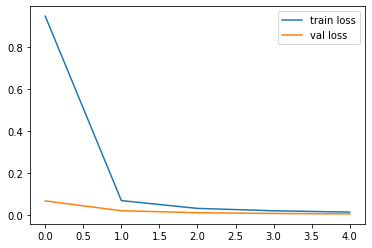

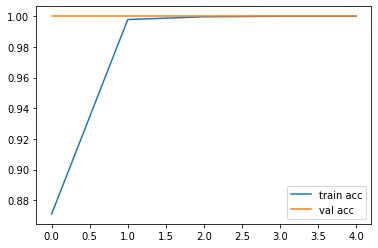

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')


model.save('facefeatures_new_model_final.h5')
